<a href="https://colab.research.google.com/github/AkotoChristine/Online_Fraud_Detection/blob/main/Summative_Intro_to_ml_%5Bname_number%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [132]:
#Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [133]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)

In [134]:
data=pd.read_csv('onlinefraud.csv')  
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [135]:
data.shape

(6362620, 11)

In [136]:
data.duplicated().sum()

np.int64(0)

In [137]:
data.drop_duplicates(inplace=True)

In [138]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [139]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [140]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [141]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [142]:
data['isFraud'].value_counts(normalize=True)


isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [143]:
data['type'].nunique() #df['nameDest'].nunique()


5

In [144]:
data['step'].nunique()


743

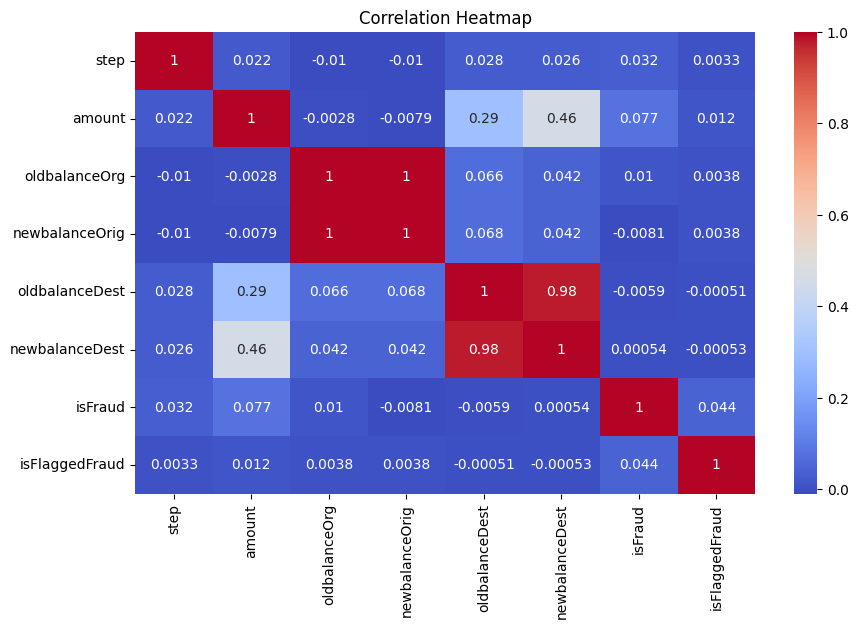

In [145]:
numeric_df = data.select_dtypes(include="number")
corr = numeric_df.corr()  # Get correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [146]:
(data['oldbalanceOrg'] == data["oldbalanceDest"]).value_counts()

False    5586475
True      776145
Name: count, dtype: int64

In [147]:
(data['newbalanceOrig'] == data["oldbalanceOrg"]).value_counts()

False    4273583
True     2089037
Name: count, dtype: int64

## data preprocessing 

In [148]:
data['type'] = data['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [149]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [150]:
#dropping data['isFlaggedFraud'] since it wont be needed 
data = data.drop('isFlaggedFraud', axis = 1)

In [151]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [152]:
# Select features and target
features = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
            'oldbalanceDest', 'newbalanceDest']

X = data[features]
y = data['isFraud']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [153]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [154]:

#applying this because the dataset is not balanced
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)        

In [155]:
X_train_resampled = X_train_resampled[:1000]
y_train_resampled = y_train_resampled[:1000]


In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




## Task: Define a function that creates models without and With specified Optimization techniques


In [157]:
# Define a function to create models with optimization techniques
def define_model(optimizer, regularization, early_stopping, dropout, learning_rate, layers):
    model = Sequential()
    for units in layers:
        model.add(Dense(units, activation='relu', kernel_regularizer=regularization))
        if dropout:
            model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [158]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
# def loss_curve_plot(None):
#   epochs = None
#   plt.plot(epochs, loss, 'bo', label='Training loss')
#   plt.plot(epochs, val_loss, 'r', label='Validation loss')
#   plt.title('Training and Validation Loss')
#   plt.xlabel('Epochs')
#   plt.ylabel('Loss')
#   plt.legend()
#   plt.show()

SyntaxError: invalid syntax (1886056846.py, line 1)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [162]:
# Model 1: Adam optimizer, L2 regularization, Early stopping
model_1 = define_model(Adam, l2(0.01), True, 0.2, 0.001, [64, 32])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_1 = model_1.fit(X_train_scaled, y_train_resampled, epochs=50, batch_size=32, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.7407 - loss: 1.1437 - val_accuracy: 0.9987 - val_loss: 0.8322
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9910 - loss: 0.7806 - val_accuracy: 0.9987 - val_loss: 0.5710
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 806ms/step - accuracy: 0.9915 - loss: 0.5524 - val_accuracy: 0.9987 - val_loss: 0.4144
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9932 - loss: 0.4127 - val_accuracy: 0.9987 - val_loss: 0.3229
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9931 - loss: 0.3382 - val_accuracy: 0.9987 - val_loss: 0.2600
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9946 - loss: 0.2680 - val_accuracy: 0.9987 - val_loss: 0.2127
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9945 - loss: 0.2213 - val_accuracy: 0.9987 - val_loss: 0.1760
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9940 - loss: 0.1873 - val_accuracy: 0.9987 - val_lo

In [ ]:
#Model 2: RMSprop optimizer, L1 regularization, No Early stopping
model_2 = define_model(RMSprop, l1(0.01), False, 0.2, 0.001, [64, 32])
history_2 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [ ]:
#TODO:
model_3 = define_model('RMSPop',None)
loss_curve_plot(model_3):
#print out confusion matrix and error analysis metrics after the cell

In [ ]:
#TODO:
model_4 = define_model(None)
loss_curve_plot(model_4):
#print out confusion matrix and error analysis metrics after the cell

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(None)
    # Make predictions
    predictions = None
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
